Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, 
and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 0,4,5,6=other)
MARRIAGE: Marital status (1=married, 2=single, 3=divorce, 0=other)
AGE: Age in years

-1=pay duly, 
1=payment delay for one month, 
2=payment delay for two months, ... 8=payment delay for eight months, 
9=payment delay for nine months and above, 

-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)

-1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due

0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance

PAY_0: Repayment status in September, 2005 
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, b2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
df = pd.read_csv("defaults.csv", header = 1, index_col = 'ID')

# Convert column nmaes to lower case and change the last column name to 'default'
df.columns = [x.lower() for x in list(df.columns)]
df.columns = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept', 'pay_aug',
       'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'bill_amt_sept', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_sept',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr',
       'default']

df.head()

,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


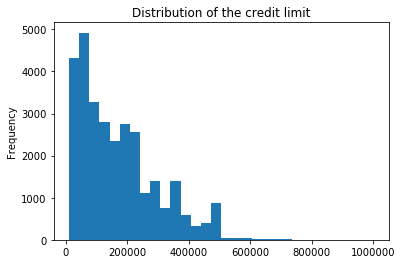

In [298]:
# Start exploring the columns

df.limit_bal.plot('hist', bins = 30, title = 'Distribution of the credit limit')

In [299]:
# Gender remapping. Male to 0, and female to 1.

gender_remapping = {1: 0, 2: 1}
df.sex = df.sex.map(gender_remapping)

#Checking the result of remapping

df.sex.value_counts()

1    18112
0    11888
Name: sex, dtype: int64

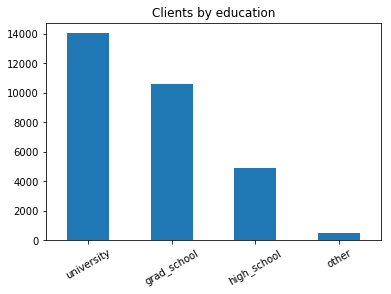

In [300]:
#Remapping df.education column and plotting the clients distribution by education
df.education = df.education.astype(str)
education_remapping = {'1': 'grad_school', '2': 'university', '3': 'high_school', '4': 'other', 
                       '5': 'other', '6': 'other', '0': 'other'}
df.education = df.education.map(education_remapping)

# Plotting the distribution of clients by their education
df.education.value_counts().plot(kind='bar', rot = 30, title = 'Clients by education')

In [301]:
# checking for any potential unknown values
df.marriage.value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

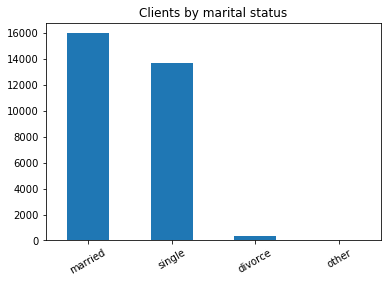

In [302]:
#Remapping df.marriage column and plotting the clients distribution by marital status
df.marriage = df.marriage.astype(str)
marriage_remapping = {'1': 'single', '2': 'married', '3': 'divorce', '0': 'other'}
df.marriage = df.marriage.map(marriage_remapping)

# Plotting the distribution of clinets by their mariatal status
df.marriage.value_counts().plot(kind='bar', rot = 30, title = 'Clients by marital status')

In [303]:
df.loc[:20, 'pay_sept':'pay_amt_apr']

,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sept,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr
ID,,,,,,,,,,,,,,,,,,
1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
8,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
9,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000


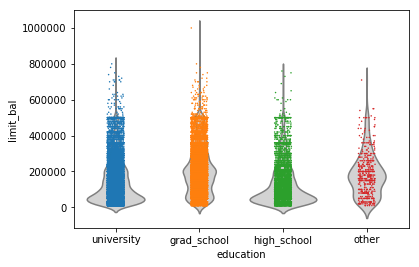

In [304]:
# Vizualization of limit_bal distribution as a function of educational level. Using violin plot.

sns.violinplot(x='education', y='limit_bal', data=df, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='education', y='limit_bal', data=df, jitter=True, size = 1.5)

# Display the plot
plt.show()


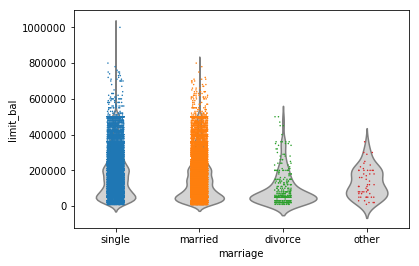

In [305]:
# Vizualization of limit_bal distribution as a function of marital status.

sns.violinplot(x='marriage', y='limit_bal', data=df, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='marriage', y='limit_bal', data=df, jitter=True, size = 1.5)

# Display the plot
plt.show()

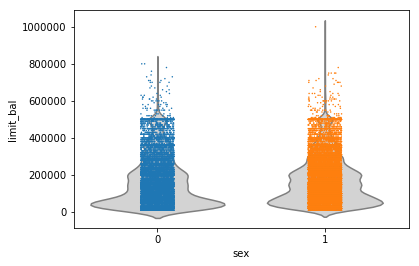

In [306]:
# Vizualization of limit_bal distribution as a function of gender.
# Male: 0, female: 1.

sns.violinplot(x='sex', y='limit_bal', data=df, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='sex', y='limit_bal', data=df, jitter=True, size = 1.5)

# Display the plot
plt.show()

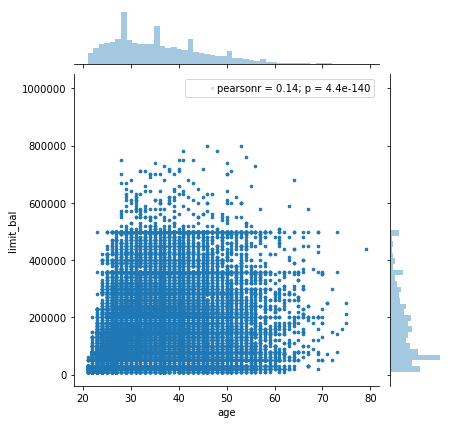

In [307]:
# Investigating relationship between the age and the limit balance.

# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='age', y='limit_bal', data=df, s = 7)

# Display the plot
plt.show()


In [308]:
#Creating dummy features for df.education and df.marriage columns as currently their values are encoded as
# ordinal features, which is not correct

#df = pd.get_dummies(df)